In [ ]:
# Exploratory Data Analysis: ME/CFS vs Depression

# In this project, I explore a health-related dataset to compare individuals diagnosed with **ME/CFS** and **Depression**. The main goal is to understand how various factors such as stress level, sleep, and activity levels vary across these groups, and how they might relate to symptoms.

# I also created new features to enhance the dataset and used visualization and statistical summaries to extract insights.

In [ ]:
## Step 1: Load and Inspect Data

# Here, I loaded the dataset and used functions like `head()`, `describe()`, and `info()` to get a basic understanding of the structure and types of data.

In [101]:
import pandas as pd
df = pd.read_csv("me_cfs_vs_depression_dataset.csv")
df


,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,NaN,24.0,1.6,13.0,6.9,0,Partially working,NaN,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,No,Both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25,Female,8.2,9.2,8.8,3.6,10.0,6.9,29.0,3.2,0,Partially working,Medium,NaN,Yes,Depression
996,66,Male,9.7,1.3,2.4,2.8,9.0,7.0,34.0,NaN,1,Working,Very high,Rarely,No,ME/CFS
997,52,Male,8.7,4.2,8.7,3.4,7.0,7.0,40.0,9.2,1,Working,Very high,Daily,Yes,ME/CFS
998,69,Male,2.1,1.1,9.9,2.5,15.0,3.5,37.0,3.3,0,Partially working,Low,Never,No,Depression


In [ ]:
df.info()
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1000 non-null   int64  
 1   gender                        1000 non-null   object 
 2   sleep_quality_index           953 non-null    float64
 3   brain_fog_level               952 non-null    float64
 4   physical_pain_score           966 non-null    float64
 5   stress_level                  952 non-null    float64
 6   depression_phq9_score         978 non-null    float64
 7   fatigue_severity_scale_score  979 non-null    float64
 8   pem_duration_hours            976 non-null    float64
 9   hours_of_sleep_per_night      979 non-null    float64
 10  pem_present                   1000 non-null   int64  
 11  work_status                   953 non-null    object 
 12  social_activity_level         960 non-null    object 
 13  exer

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
count,1000.000000,1000,953.000000,952.000000,966.000000,952.000000,978.000000,979.000000,976.000000,979.000000,1000.000000,953,960,961,989,1000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,5,2,3
top,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Partially working,Very low,Rarely,Yes,Depression
freq,NaN,524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335,203,210,505,401
mean,44.385000,NaN,5.468625,5.611765,5.521843,5.459139,12.268916,6.407252,23.105533,6.571297,0.599000,NaN,NaN,NaN,NaN,NaN
std,15.321669,NaN,2.571423,2.649316,2.565460,2.566536,6.306588,2.206937,13.823953,2.040320,0.490346,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,31.750000,NaN,3.100000,3.300000,3.325000,3.300000,9.000000,6.300000,11.000000,4.800000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,45.000000,NaN,5.600000,5.800000,5.600000,5.400000,10.000000,7.000000,23.000000,6.600000,1.000000,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,7.700000,7.900000,7.800000,7.700000,16.000000,7.500000,35.000000,8.350000,1.000000,NaN,NaN,NaN,NaN,NaN


In [85]:
df.dtypes

age                               int64
gender                           object
sleep_quality_index             float64
brain_fog_level                 float64
physical_pain_score             float64
stress_level                    float64
depression_phq9_score           float64
fatigue_severity_scale_score    float64
pem_duration_hours              float64
hours_of_sleep_per_night        float64
pem_present                       int64
work_status                      object
social_activity_level            object
exercise_frequency               object
meditation_or_mindfulness        object
diagnosis                        object
sleep_efficiency                float64
high_stress                        bool
dtype: object

In [86]:
## Step 2: Statistical Summary and Distribution

# I checked the distribution of different diagnoses, gender, and computed descriptive statistics like **mean**, **mode**, and **standard deviation**. I also used `value_counts(normalize=True)` to see proportions.

In [ ]:
df['diagnosis'].value_counts()


diagnosis
Both          6.522488
Depression    6.587208
ME/CFS        6.580061
Name: hours_of_sleep_per_night, dtype: float64

In [90]:
df['gender'].value_counts(normalize=True) * 100

gender
Male      52.4
Female    47.6
Name: proportion, dtype: float64

In [91]:
df.corr(numeric_only=True)

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,sleep_efficiency,high_stress
age,1.000000,-0.078953,0.077304,0.003115,-0.007335,-0.035705,0.011755,0.017379,-0.053475,0.007779,0.018367,0.000670
sleep_quality_index,-0.078953,1.000000,0.013852,0.067618,0.039608,-0.000111,0.048131,-0.005968,0.018933,-0.018941,0.019242,0.050453
brain_fog_level,0.077304,0.013852,1.000000,-0.032239,0.021975,-0.002741,0.036221,0.038012,0.002401,0.036849,-0.026654,0.006392
physical_pain_score,0.003115,0.067618,-0.032239,1.000000,-0.008300,-0.018301,-0.000374,-0.002938,-0.003989,0.030503,0.025398,-0.001706
stress_level,-0.007335,0.039608,0.021975,-0.008300,1.000000,0.027432,-0.035305,-0.026046,-0.016899,0.010016,0.014061,0.848017
depression_phq9_score,-0.035705,-0.000111,-0.002741,-0.018301,0.027432,1.000000,-0.192968,-0.010418,0.025699,-0.349618,-0.020913,0.029923
fatigue_severity_scale_score,0.011755,0.048131,0.036221,-0.000374,-0.035305,-0.192968,1.000000,-0.035060,0.018756,0.585374,0.062798,-0.058512
pem_duration_hours,0.017379,-0.005968,0.038012,-0.002938,-0.026046,-0.010418,-0.035060,1.000000,-0.015427,0.011636,-0.533788,-0.031081
hours_of_sleep_per_night,-0.053475,0.018933,0.002401,-0.003989,-0.016899,0.025699,0.018756,-0.015427,1.000000,-0.006452,0.159965,0.004129
pem_present,0.007779,-0.018941,0.036849,0.030503,0.010016,-0.349618,0.585374,0.011636,-0.006452,1.000000,0.057676,0.001941


In [ ]:
## Step 3: Handling Missing Values

# Before building new features, I handled missing values using the `fillna()` method. For example:

# - For **numerical columns**, missing values were filled with the **mean** of the column.
# - For **categorical columns**, missing values were filled with the **mode** (most frequent value).

# This ensures consistency in the data and avoids errors in aggregation or plotting.


In [ ]:
df['sleep_quality_index'] = df['sleep_quality_index'].fillna(df['sleep_quality_index'].mean())
df['brain_fog_level'] = df['brain_fog_level'].fillna(df['brain_fog_level'].mean())
df['stress_level'] = df['stress_level'].fillna(df['stress_level'].mean())
df['depression_phq9_score'] = df['depression_phq9_score'].fillna(df['depression_phq9_score'].mean())
df['fatigue_severity_scale_score'] = df['fatigue_severity_scale_score'].fillna(df['fatigue_severity_scale_score'].mean())
df['pem_duration_hours'] = df['pem_duration_hours'].fillna(df['pem_duration_hours'].mean())
df['hours_of_sleep_per_night'] = df['hours_of_sleep_per_night'].fillna(df['hours_of_sleep_per_night'].mean())
df['exercise_frequency'] = df['exercise_frequency'].fillna(df['exercise_frequency'].mode()[0])
df['meditation_or_mindfulness'] = df['meditation_or_mindfulness'].fillna(df['meditation_or_mindfulness'].mode()[0])
df['physical_pain_score'] = df['physical_pain_score'].fillna(df['physical_pain_score'].mean())
df['work_status'] = df['work_status'].fillna(df['work_status'].mode()[0])
df['social_activity_level'] = df['social_activity_level'].fillna(df['social_activity_level'].mode()[0])


In [36]:
df.isnull().sum()

age                             0
gender                          0
sleep_quality_index             0
brain_fog_level                 0
physical_pain_score             0
stress_level                    0
depression_phq9_score           0
fatigue_severity_scale_score    0
pem_duration_hours              0
hours_of_sleep_per_night        0
pem_present                     0
work_status                     0
social_activity_level           0
exercise_frequency              0
meditation_or_mindfulness       0
diagnosis                       0
dtype: int64

In [92]:
## Step 4: Group-wise Comparison

# Using `groupby` and `agg`, I compared **stress level** and **sleep hours** across different groups by `diagnosis` and `gender`. This helped identify which groups face higher stress or poor sleep.

In [93]:
df.groupby('diagnosis')['hours_of_sleep_per_night'].mean()

diagnosis
Both          6.522488
Depression    6.587208
ME/CFS        6.580061
Name: hours_of_sleep_per_night, dtype: float64

In [94]:
df.groupby(['diagnosis', 'gender'])[['stress_level', 'hours_of_sleep_per_night']].agg(['mean', 'std'])

stress_level           hours_of_sleep_per_night          
                          mean       std                     mean       std
diagnosis  gender                                                          
Both       Female     5.775205  2.423342                 6.407637  2.064421
           Male       5.359544  2.500618                 6.637340  1.987209
Depression Female     5.523354  2.624008                 6.533407  2.037670
           Male       5.343934  2.514063                 6.635172  1.999196
ME/CFS     Female     5.349439  2.496865                 6.499228  1.933203
           Male       5.510452  2.442535                 6.651317  2.102526

In [104]:
pd.pivot_table(df, index='diagnosis', columns='gender', values='stress_level', aggfunc='mean')

gender,Female,Male
diagnosis,,
Both,5.791667,5.352128
Depression,5.525824,5.340000
ME/CFS,5.346409,5.514948


In [105]:
pd.crosstab(df['diagnosis'], df['gender'], normalize='index') * 100

gender,Female,Male
diagnosis,,
Both,50.000000,50.000000
Depression,47.132170,52.867830
ME/CFS,46.851385,53.148615


In [106]:
df.sort_values(by='depression_phq9_score', ascending=False).head()

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
292,59,Female,2.1,9.8,8.6,4.0,27.0,0.2,47.0,9.3,0,Partially working,Low,Never,Yes,Depression
629,41,Male,6.6,2.5,7.8,7.7,27.0,6.5,NaN,5.9,0,Working,Very low,Often,Yes,Depression
38,64,Male,8.9,6.5,8.1,9.1,27.0,7.0,42.0,5.0,1,Not working,Very low,Rarely,Yes,Both
448,40,Female,4.8,2.4,2.8,2.9,27.0,8.0,21.0,4.0,0,Partially working,Very high,Daily,No,Depression
443,63,Female,NaN,7.0,2.7,1.5,27.0,5.4,30.0,4.8,0,NaN,Low,Daily,Yes,Depression


In [ ]:
## Step 5: Feature Engineering

# To better analyze the data, I added two new features:

# - `high_stress`: a boolean column indicating if the person's stress level is above the average.
# - `sleep_efficiency`: calculated as hours of sleep per night divided by PEM duration (Post-Exertional Malaise).



In [95]:
df['high_stress'] = df['stress_level'] > df['stress_level'].mean()
df['high_stress'].value_counts()

high_stress
False    525
True     475
Name: count, dtype: int64

In [107]:
df['sleep_efficiency'] = df['hours_of_sleep_per_night'] / df['pem_duration_hours']

In [ ]:
## Step 6: Visualization

# To explore how stress levels and sleep patterns vary across different subgroups, I performed group-wise aggregation using `groupby()` and `agg()`.
# - First, I compared the **average hours of sleep per night** across diagnosis groups.
# - Then, I calculated both the **mean** and **standard deviation** of `stress_level` and `hours_of_sleep_per_night`, grouped by both `diagnosis` and `gender`.

# This analysis helps identify patterns such as whether certain diagnosis groups (e.g., Depression or ME/CFS) or genders experience more stress or sleep disruption.

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


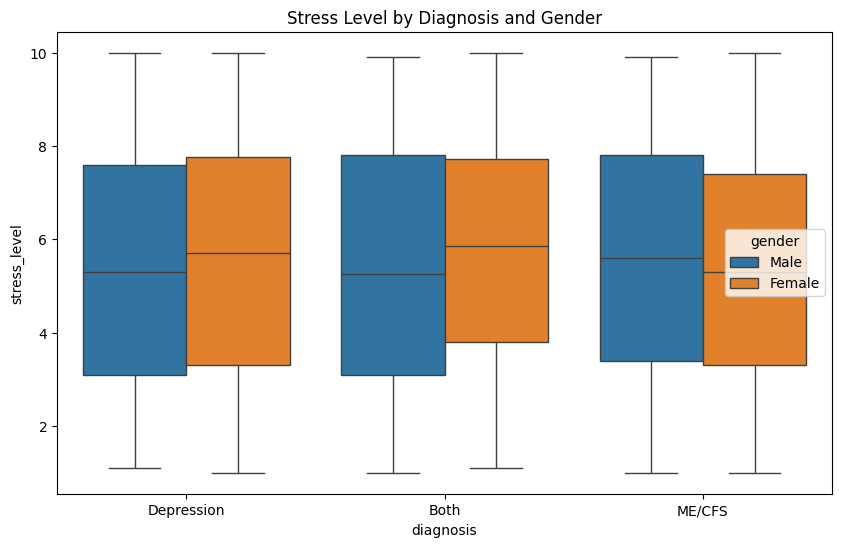

In [103]:
!pip3 install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='diagnosis', y='stress_level', hue='gender')
plt.title('Stress Level by Diagnosis and Gender')
plt.show()


In [ ]:
### 📌 Key Findings

# 1. **Diagnosis Distribution**  
  # The dataset contains three diagnosis groups: *Depression*, *ME/CFS*, and *Both*. The distribution is relatively balanced, with *Depression* being slightly more common.

# 2. **Gender Distribution**  
  # The gender split is nearly even: **52.4% Male** and **47.6% Female** across all diagnosis groups.

# 3. **Average Hours of Sleep per Diagnosis**  
   #- People with **ME/CFS** had the highest average sleep duration (~6.58 hours).  
   #- The **Both** group had the lowest (~6.52 hours).  
   #- Overall, sleep duration was fairly consistent across groups.

# 4. **Stress Level by Diagnosis and Gender**  
  # - **Female** participants showed slightly higher average stress levels than males in all groups.  
  # - The highest stress levels were observed in the **Both** group, especially among females.

#5. **Standard Deviation Insight**  
  # - The standard deviation of stress and sleep scores varied across groups, indicating more variability in some populations.

#6. **Pivot Table & Crosstab Analysis**  
   #- The pivot table and crosstab helped visualize how **stress levels differ by gender and diagnosis**.  
   #- For example, females with *Depression* had higher stress levels compared to males with the same diagnosis.

#7. **Top Depression Scores**  
  # - The top 5 rows with the highest `depression_phq9_score` showed patterns of **high stress**, **severe fatigue**, and **physical pain**, indicating strong associations.

#8. **Feature Engineering**  
   #Two new features were created:
   #- `high_stress`: A boolean indicating whether a person’s stress level is above average.
   #- `sleep_efficiency`: Calculated as hours of sleep per night divided by PEM duration.

   #These features add value for further analysis or modeling.